# Datenvorbereitung: Vektorisierung strukturierter Daten

Machine Learning benötigt für fast alle Verfahren sog. [Vektoren](https://de.wikipedia.org/wiki/Vektor). Dabei handelt es sich vereinfacht ausgedrückt um *Arrays*, die Daten in einer bestimmten Weise modellieren. Die Einträge in den Vektoren stellen dabei sog. *Features* oder [Merkmale](https://de.wikipedia.org/wiki/Merkmal) dar.

Oftmals ist es bei Daten ganz einfach, die Features zu finden - manchmal wirst du aber auch große Schwierigkeiten damit haben. 

In diesem Teil beschäftigst du dich mit *strukturierten Daten*. Damit ist die Vektorisierung relativ einfach, aber auch hier gibt es einige Fallstricke.

## Strukturierte Daten

Strukturierte Daten lassen sich gut an dem sog. [Iris-Datenset](https://en.wikipedia.org/wiki/Iris_flower_data_set) erklären. Zum Glück ist das schon in `scikit-learn` enthalten, d.h. du musst es gar nicht herunterladen.

Es handelt sich dabei um Messwerte und Spezies von Pflanzen:

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg) ![image](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg) ![image](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg)

Den Datensatz kannst du einfach mithilfe von `scikit-learn` laden:

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Das ist leider etwas unübersichtlich - besser stellst du das als `DataFrame` mit `pandas` dar:

In [2]:
import pandas as pd
features = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
idf = pd.DataFrame(iris["data"], columns=features)
idf["name"] = [iris["target_names"][target] for target in iris["target"]]
idf

,Sepal Length,Sepal Width,Petal Length,Petal Width,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Einen ersten Eindruck über die Verteilung der Größen verschafft dir die sog. *Five Number Summary*:

In [3]:
idf.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Du kannst die Verteilung der Größen auch als Histogramm plotten:

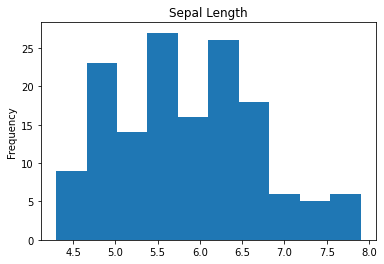

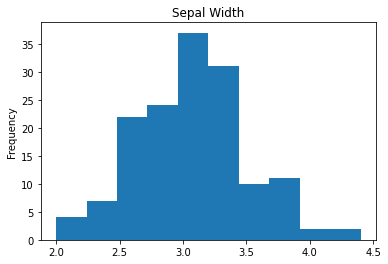

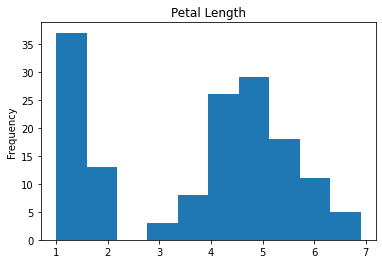

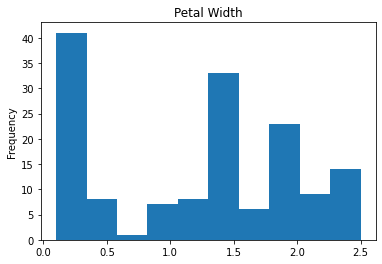

In [4]:
import matplotlib.pyplot as plt
for f in features:
    fig = idf[f].plot.hist(title=f)
    plt.show()
    plt.close()

Wie du siehst, sind die Werte der Features alle relativ gleich verteilt, d.h. es gibt keine Extremwerte. Solche Features kannst du direkt als Dimensionen für deine Vektoren verwenden.

Allerdings könnte es gut sein, dass die Features nicht voneinander unabhängig sind. Dadurch setzt du dich der Gefahr eine Überbestimmung (Overfitting) aus. Am besten kannst du das in einem sog. *Pairplot* erkennen:

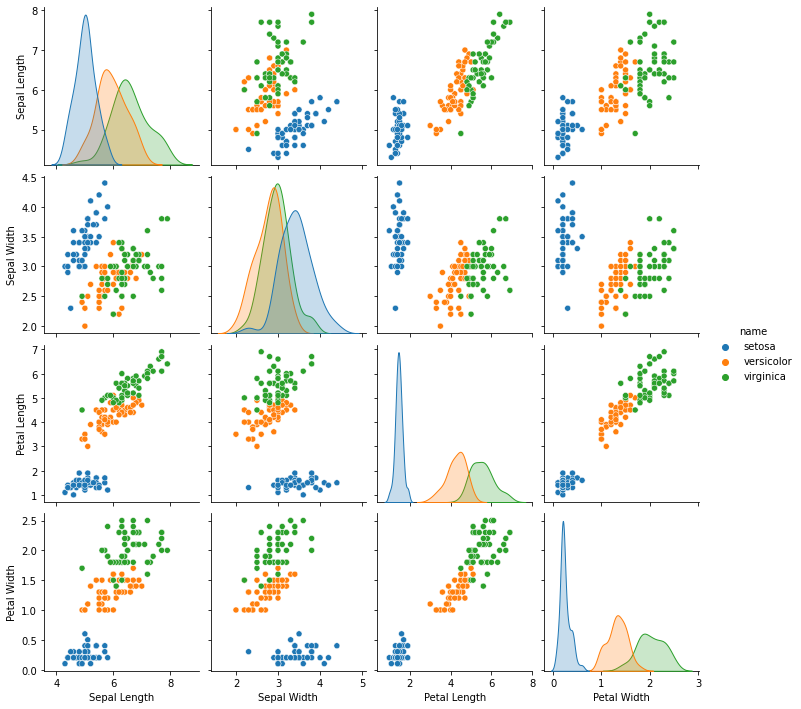

In [5]:
import seaborn as sns
sns.pairplot(idf, hue="name")

Hier kannst du gut erkennen, das die Features `Petal Length` und `Petal Width` stark miteinander korrelieren, vermutlich weil sie einfach mit der Ausdehnung der Blüte skalieren. Bei einem Machine Learning-Projekt müsstest du jetzt vorsichtig sein und evtl. nur mit einem der beiden Features arbeiten.

## Skalierung von Daten

Wie du oben sehen kannst, sind die Werte in den einzelnen Features *nicht gleichverteilt*. Üblicherweise sind die Breiten immer kleiner als die Längen. Das kann dir bei manchen Machine Learning-Algorithmen Schwierigkeiten bereiten.

`scikit-learn` kann dir dabei helfen. Wenn du den `StandardScaler` benutzt, werden die Werte so normalisiert, dass sie einen einheitlichen Mittelwert (`0`) und die gleiche Standardabweichung (`1`) haben:

In [6]:
from sklearn.preprocessing import StandardScaler
idf_scale = pd.DataFrame(StandardScaler().fit_transform(idf[features]), columns=features)
idf_scale.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


Das kannst du dir auch grafisch anzeigen lassen:

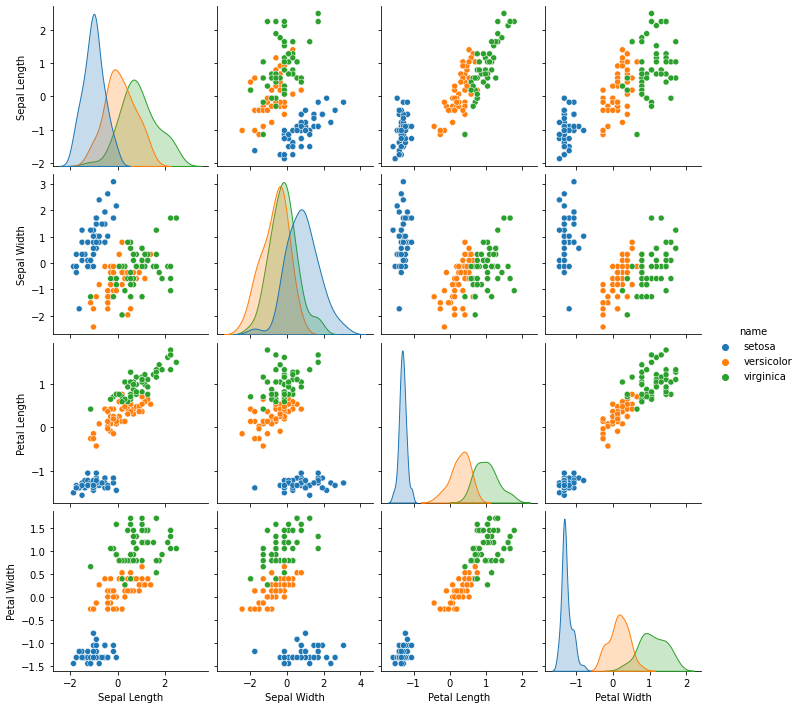

In [7]:
idf_scale["name"] = [iris["target_names"][target] for target in iris["target"]]
sns.pairplot(idf_scale, hue="name")

Das Verfahren funktioniert hier ganz gut, weil es keine [Ausreißer](https://de.wikipedia.org/wiki/Ausreißer) gibt. Wenn du Daten hast, bei denen das der Fall ist, verwendest du besser den `RobustScaler`, der mit Quantilen arbeitet:

In [8]:
from sklearn.preprocessing import RobustScaler
idf_rscale = pd.DataFrame(RobustScaler().fit_transform(idf[features]), columns=features)
idf_rscale.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,1.500000e+02,150.000000
mean,0.033333,0.114667,-1.691429e-01,-0.067111
std,0.636974,0.871733,5.043709e-01,0.508158
min,-1.153846,-2.000000,-9.571429e-01,-0.800000
25%,-0.538462,-0.400000,-7.857143e-01,-0.666667
50%,0.000000,0.000000,1.266348e-16,0.000000
75%,0.461538,0.600000,2.142857e-01,0.333333
max,1.615385,2.800000,7.285714e-01,0.800000


Die Mittelwerte und Standardabweichungen sind nun nicht normiert, dafür ist der Median nun überall 0. Je nach Daten kann diese Darstellung deutlich besser funktionieren.

## Strukturierte Daten vektorisieren

Strukturiert Werte lassen sich (relativ) leicht vektorisieren. Ein bisschen solltest du dabei auf die Skalierung der Werte achten. Diese Unterschiede und die daraus erwachsenden Differenzen bei den Modellen werden wir bei den un/überwachten Lernverfahren nochmal detailliert betrachten.

Deutlich schwieriger hast du es mit unstrukturierten Daten - das schaust du dir im nächsten Teil an.